# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15668029172                   -0.60    6.1    322ms
  2   -11.16020201231       -2.45       -1.30    1.0    135ms
  3   -11.16040034280       -3.70       -2.33    2.1    173ms
  4   -11.16041628098       -4.80       -3.22    2.6    198ms
  5   -11.16041703647       -6.12       -3.47    2.6    202ms
  6   -11.16041704665       -7.99       -3.63    1.1    127ms
  7   -11.16041705059       -8.41       -3.99    1.0    123ms
  8   -11.16041705127       -9.16       -4.50    1.7    140ms
  9   -11.16041705142       -9.82       -5.01    1.9    152ms
 10   -11.16041705144      -10.65       -5.28    1.7    161ms
 11   -11.16041705145      -11.53       -5.53    1.3    136ms
 12   -11.16041705145      -11.86       -5.80    1.1    148ms
 13   -11.16041705145      -12.10       -6.11    1.1    127ms


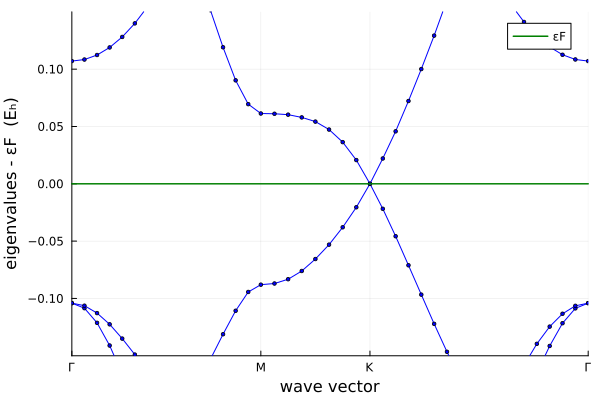

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C; psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)